In [143]:
from help import find_file,list_files
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection  import train_test_split

In [144]:
data_ex  = pd.read_csv(find_file("exercise.csv"))
data_cal  = pd.read_csv(find_file("calories.csv"))
data  =  pd.concat([data_cal,data_ex],axis=1)
data = data.drop(columns=['User_ID'])

In [145]:
data.head()

,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,35.0,female,27,154.0,58.0,10.0,81.0,39.8


<AxesSubplot: ylabel='Gender'>

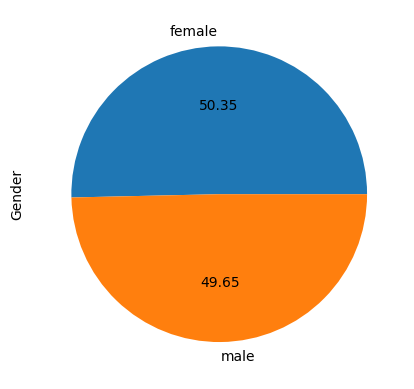

In [146]:
data['Gender'].value_counts().plot(kind='pie',autopct='%.2f')

In [147]:
def get_num_people_by_age_category(df):
    df["age_group"] = pd.cut(x=df['Age'], bins=[0,30,60,100], labels=["young","middle_aged","old"])
    return df

<AxesSubplot: ylabel='age_group'>

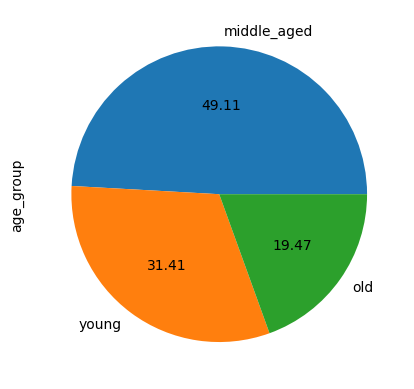

In [148]:
data =  get_num_people_by_age_category(data)
data["age_group"].value_counts().plot(kind='pie',autopct="%.2f")

<AxesSubplot: xlabel='Age', ylabel='Calories'>

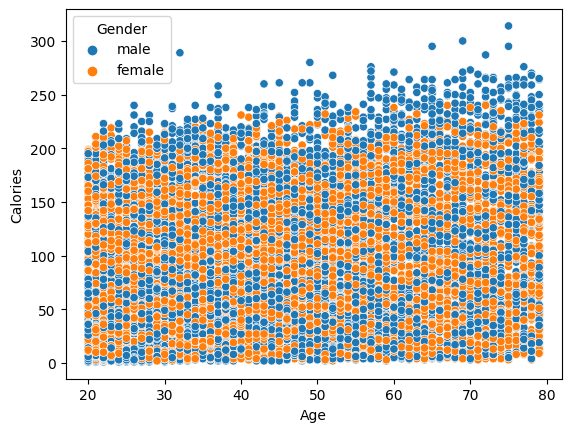

In [149]:
sns.scatterplot(data=data,x = "Age",y = "Calories",hue='Gender')

<AxesSubplot: xlabel='Age', ylabel='Duration'>

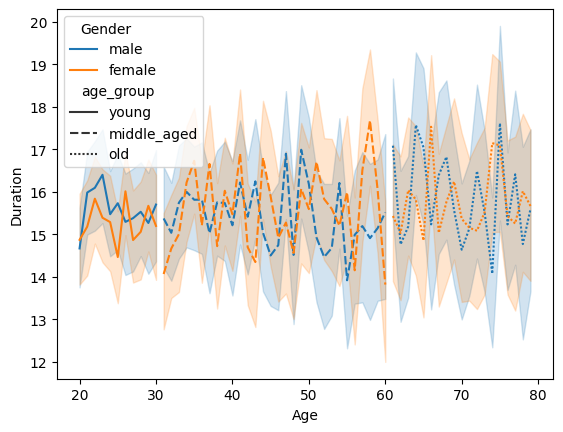

In [150]:
sns.lineplot(data=data,x = "Age",y = "Duration",hue="Gender",style="age_group")

##### The above graph shows not much relationship b/w age and duration thus we will remove this column

In [151]:
data.corr()["Calories"]

C:\Users\RISHABH\AppData\Local\Temp\ipykernel_25828\3467304990.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()["Calories"]


Calories      1.000000
Age           0.154395
Height        0.017537
Weight        0.035481
Duration      0.955421
Heart_Rate    0.897882
Body_Temp     0.824558
Name: Calories, dtype: float64

##### Correlation with duration, heart rate and Body temp is high and this makes sense bcuz the longer you run the more calories will be burned 

<AxesSubplot: xlabel='Heart_Rate', ylabel='Calories'>

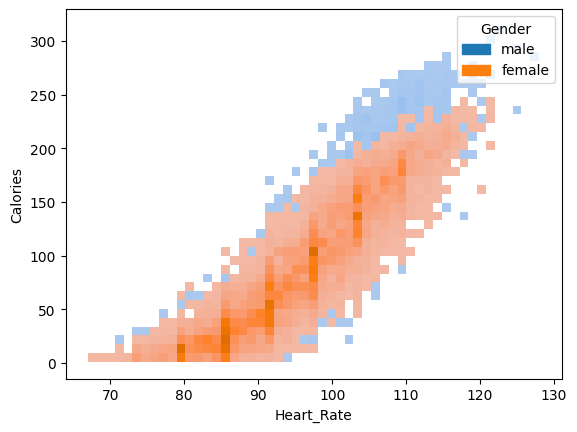

In [152]:
sns.histplot(data=data,x='Heart_Rate',y='Calories',hue='Gender')

##### In all duration male run longer than female might be testerone boost !!

<AxesSubplot: xlabel='Duration', ylabel='Calories'>

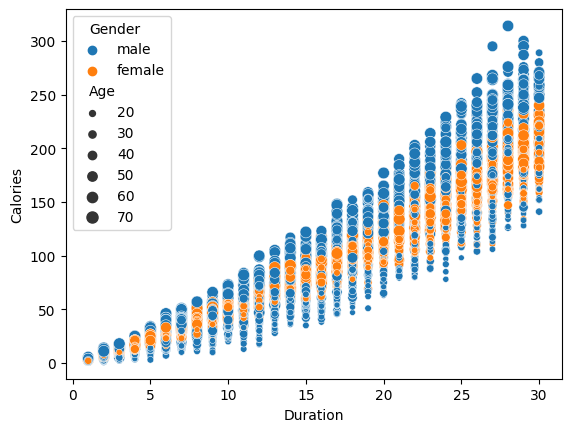

In [153]:
sns.scatterplot(data=data,x='Duration',y='Calories',hue='Gender',size="Age")

<AxesSubplot: xlabel='Height', ylabel='Calories'>

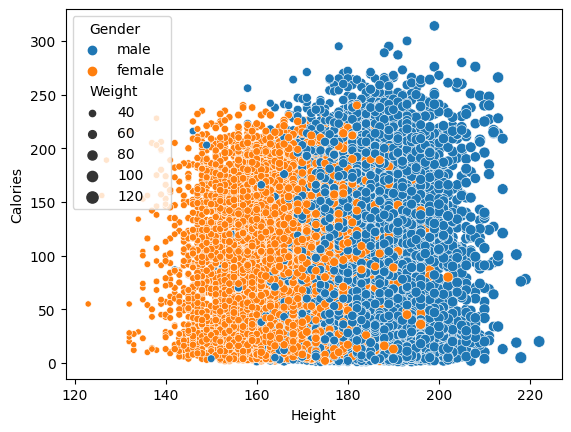

In [154]:
sns.scatterplot(data=data,x='Height',y='Calories',hue='Gender',size="Weight")

##### Generally males have more height thus more calories loss and has more weight 

<AxesSubplot: xlabel='Height', ylabel='Duration'>

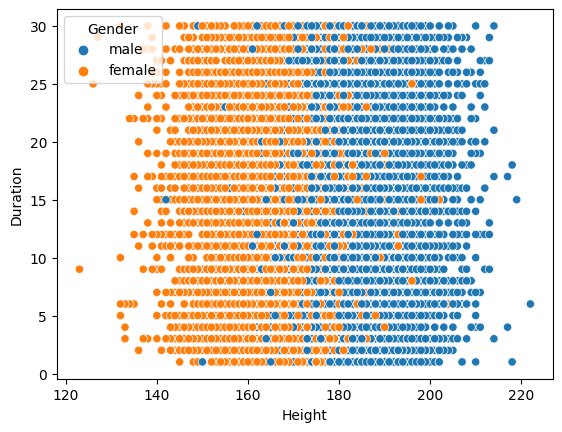

In [155]:
sns.scatterplot(data=data,x='Height',y='Duration',hue='Gender')

##### More Height means longer duration running and the person is generally male 

<AxesSubplot: xlabel='Weight', ylabel='Duration'>

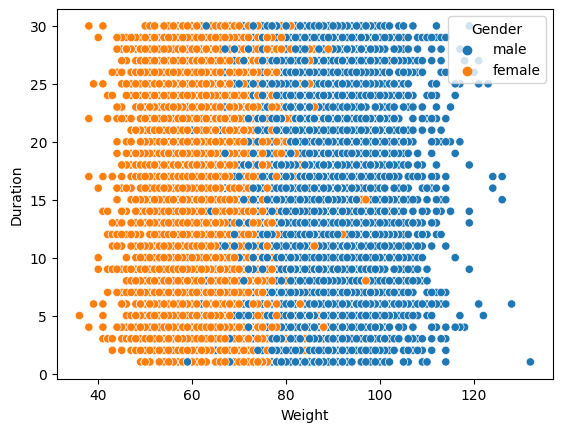

In [156]:
sns.scatterplot(data=data,x='Weight',y='Duration',hue='Gender')

In [299]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor ## done sample prediction and it is performing better 
from sklearn.metrics import r2_score

### Proceeding further with random forest 

In [264]:
#chosen_idx = np.random.choice(1000, replace=False, size=5)
def sample_predictions(X,y,model,size=5):
    chosen_idx = np.random.choice(1000, replace=False, size=size)
    features =  X.iloc[chosen_idx]
    target =  y.iloc[chosen_idx]
    predictions = model.predict(features)
    predictions_Df = pd.DataFrame({"Index":chosen_idx,"Original":target,"Predicted":predictions})
    return predictions_Df
    
    

In [291]:
# Model 1 all columns - > Calories 
# model 2  Gender  Age	Height	Weight -> Duration   Failed terribly heart rate and body temp 
# model 3 Gender	Age	Height	Weight Duration ->  Calories  Failed terribly without heart rate and body temp 

In [283]:
def load_data(data_model="model_1",df=None):
    df=  df.drop(columns=['age_group'])
    df["Gender"] =  df["Gender"].map({"male":1,"female":0})
    
    if data_model == 'model_1':
        X =  df.drop(columns=['Calories'])
        y =  df.Calories
    if data_model == 'model_2':
        X =  df.drop(columns=['Calories','Duration'])
        y  =  df.Duration
    if data_model == 'model_3':
        X  =  df.drop(columns=['Calories','Heart_Rate','Body_Temp'])
        y =  df.Calories
    return (X,y )

### Model 1 -> all columns - > Calories 

In [284]:
X,y = load_data(df=data)

In [247]:
X.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,1,68,190.0,94.0,29.0,105.0,40.8
1,0,20,166.0,60.0,14.0,94.0,40.3
2,1,69,179.0,79.0,5.0,88.0,38.7
3,0,34,179.0,71.0,13.0,100.0,40.5
4,0,27,154.0,58.0,10.0,81.0,39.8


In [248]:
x_train,x_test,y_train,y_test =  train_test_split(X,y,test_size=0.2)

In [249]:
model_1 =  RandomForestRegressor()

In [250]:
model_1.fit(x_train,y_train)

RandomForestRegressor()

In [251]:
model_1.score(x_test,y_test)

0.9978498126917307

In [253]:
r2_score(y_test,model_1.predict(x_test))

0.9978498126917307

In [266]:
sample_predictions(x_test,y_test,model_1)

,Index,Original,Predicted
2032,646,50.0,47.67
7220,962,24.0,24.36
1975,838,79.0,78.54
10664,124,102.0,98.88
3573,118,35.0,34.35


### Model 2 -> Gender  Age	Height	Weight , {Heart_Rate,Body_Temp}-> Duration 

In [285]:
X,y  = load_data(data_model="model_2",df=data)

In [286]:
X.head()

,Gender,Age,Height,Weight,Heart_Rate,Body_Temp
0,1,68,190.0,94.0,105.0,40.8
1,0,20,166.0,60.0,94.0,40.3
2,1,69,179.0,79.0,88.0,38.7
3,0,34,179.0,71.0,100.0,40.5
4,0,27,154.0,58.0,81.0,39.8


In [287]:
pd.concat([X,y],axis=1).corr()['Duration']

Gender        0.003440
Age           0.013247
Height       -0.004625
Weight       -0.001884
Heart_Rate    0.852869
Body_Temp     0.903167
Duration      1.000000
Name: Duration, dtype: float64

In [288]:
model_2 =  RandomForestRegressor()
x_train,x_test,y_train,y_test =  train_test_split(X,y,test_size=0.2)

In [289]:
model_2.fit(x_train,y_train)

RandomForestRegressor()

In [290]:
model_2.score(x_test,y_test)

0.9058838886118987

In [292]:
r2_score(y_test,model_2.predict(x_test))

0.9058838886118987

In [298]:
p_model_2 = sample_predictions(x_test,y_test,model_2)
p_model_2.head()

,Index,Original,Predicted
7645,990,22.0,19.76
492,993,18.0,23.85
11254,834,3.0,3.89
5433,337,19.0,22.81
1803,657,3.0,3.45
